In [1]:
# LSTM with Dropout for sequence classification in the IMDB dataset
import numpy
import codeforces
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = codeforces.load_data(path='../codeforces_full.pkl',num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length, dropout=0.2))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Using TensorFlow backend.
/home/lupeng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301.0
Trainable params: 213,301.0
Non-trainable params: 0.0
_________________________________________________________________
None


/home/lupeng/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
18537/18537 [==============================] - 986s - loss: 0.5411 - acc: 0.7297   
Epoch 2/3
18537/18537 [==============================] - 951s - loss: 0.4220 - acc: 0.8174   
Epoch 3/3
18537/18537 [==============================] - 998s - loss: 0.3818 - acc: 0.8420   
Accuracy: 83.02%


In [2]:
#评估模型好坏
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)
#accuracy = (TP + TN) / (TP + FP + TN + FN)
#F1 Score = 2*P*R/(P+R)，其中P和R分别为 precision 和 recall
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_preds = np.round(model.predict(X_test))
result = precision_recall_fscore_support(y_test, y_preds, average='binary')
print(result)

(0.80954306510311358, 0.86367558239861952, 0.83573366729284082, None)


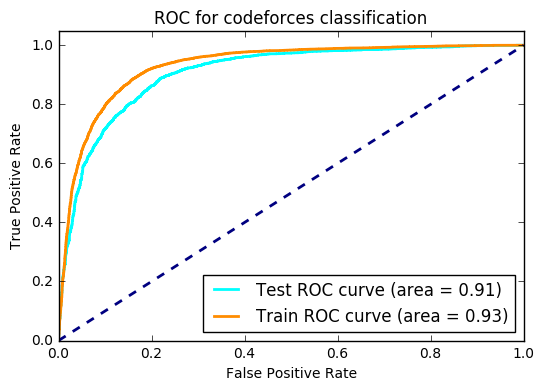

In [4]:
#ROC曲线和AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
roc_auc={}

y_score1 = model.predict(X_test)
y_score2 = model.predict(X_train)

fpr['test'], tpr['test'], _ = roc_curve(y_test, y_score1)
roc_auc['test'] = auc(fpr['test'], tpr['test'])
fpr['train'], tpr['train'], _ = roc_curve(y_train, y_score2)
roc_auc['train'] = auc(fpr['train'], tpr['train'])
    
plt.figure()
lw = 2
plt.plot(fpr['test'], tpr['test'], color='aqua',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc['test'])
plt.plot(fpr['train'], tpr['train'], color='darkorange',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc['train'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for codeforces classification')
plt.legend(loc="lower right")
plt.show()